# Genetic Variant Classification

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d kevinarvai/clinvar-conflicting

Dataset URL: https://www.kaggle.com/datasets/kevinarvai/clinvar-conflicting
License(s): CC0-1.0
 84%|███████████████████████████████▊      | 3.00M/3.59M [00:02<00:00, 2.04MB/s]
100%|██████████████████████████████████████| 3.59M/3.59M [00:02<00:00, 1.78MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Genetic Variant Classification/clinvar-conflicting.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Genetic Variant Classification')
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('clinvar_conflicting.csv')

In [5]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [6]:
df.shape

(65188, 46)

In [7]:
df.size

2998648

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POS,65188.0,7.757594e+07,5.974051e+07,961.000000,3.254179e+07,5.797021e+07,1.127454e+08,2.476080e+08
AF_ESP,65188.0,1.451052e-02,5.779541e-02,0.000000,0.000000e+00,0.000000e+00,1.200000e-03,4.990000e-01
AF_EXAC,65188.0,1.449218e-02,5.954210e-02,0.000000,0.000000e+00,4.000000e-05,1.230000e-03,4.998900e-01
AF_TGP,65188.0,1.526350e-02,5.952741e-02,0.000000,0.000000e+00,0.000000e+00,1.600000e-03,4.998000e-01
ORIGIN,65188.0,1.342486e+00,5.688772e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,5.130000e+02
SSR,130.0,2.269231e+00,4.190777e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01
CLASS,65188.0,2.521016e-01,4.342226e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
DISTANCE,108.0,8.257315e+02,1.069363e+03,1.000000,5.550000e+01,4.690000e+02,1.415000e+03,4.759000e+03
STRAND,65174.0,-6.659097e-03,9.999855e-01,-1.000000,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00
MOTIF_POS,2.0,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

CHROM                    38
POS                   63115
REF                     866
ALT                     458
AF_ESP                 2842
AF_EXAC                6667
AF_TGP                 2087
CLNDISDB               9234
CLNDISDBINCL             93
CLNDN                  9260
CLNDNINCL               101
CLNHGVS               65188
CLNSIGINCL              137
CLNVC                     7
CLNVI                 27654
MC                       90
ORIGIN                   31
SSR                       2
CLASS                     2
Allele                  374
Consequence              48
IMPACT                    4
SYMBOL                 2328
Feature_type              2
Feature                2369
BIOTYPE                   2
EXON                   3264
INTRON                 1929
cDNA_position         13970
CDS_position          13663
Protein_position       7339
Amino_acids            1262
Codons                 2220
DISTANCE                 96
STRAND                    2
BAM_EDIT            

In [13]:
df['BLOSUM62'].value_counts()

BLOSUM62
 1.0    7696
-1.0    5336
-3.0    4450
-2.0    4300
 2.0    2138
 3.0    1673
Name: count, dtype: int64

## Data Visualization

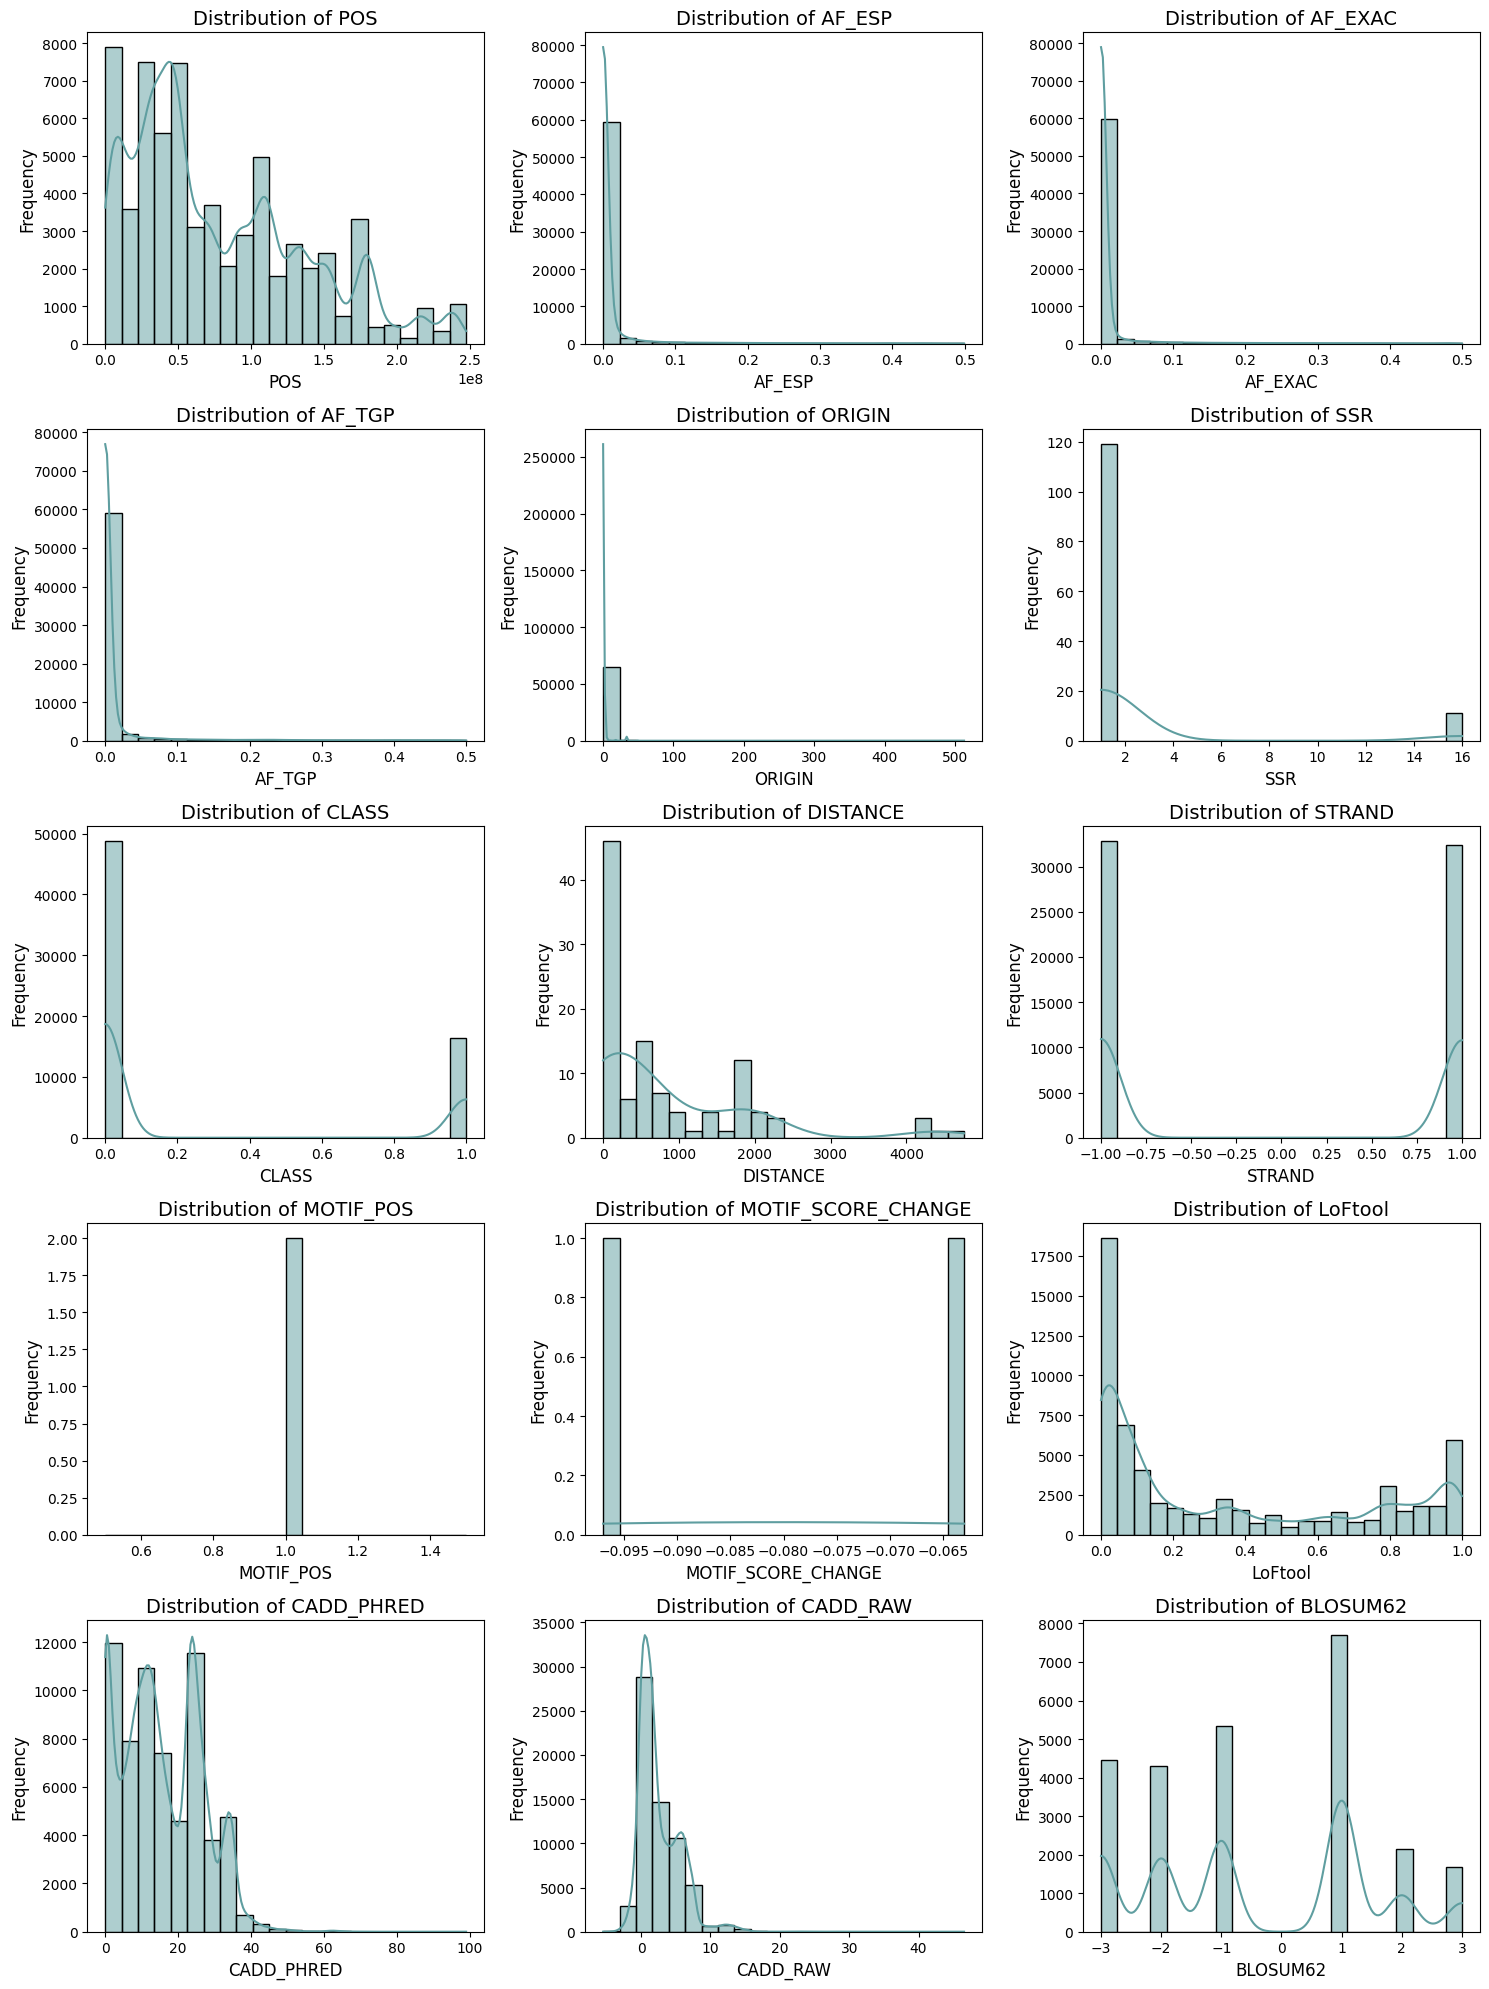

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

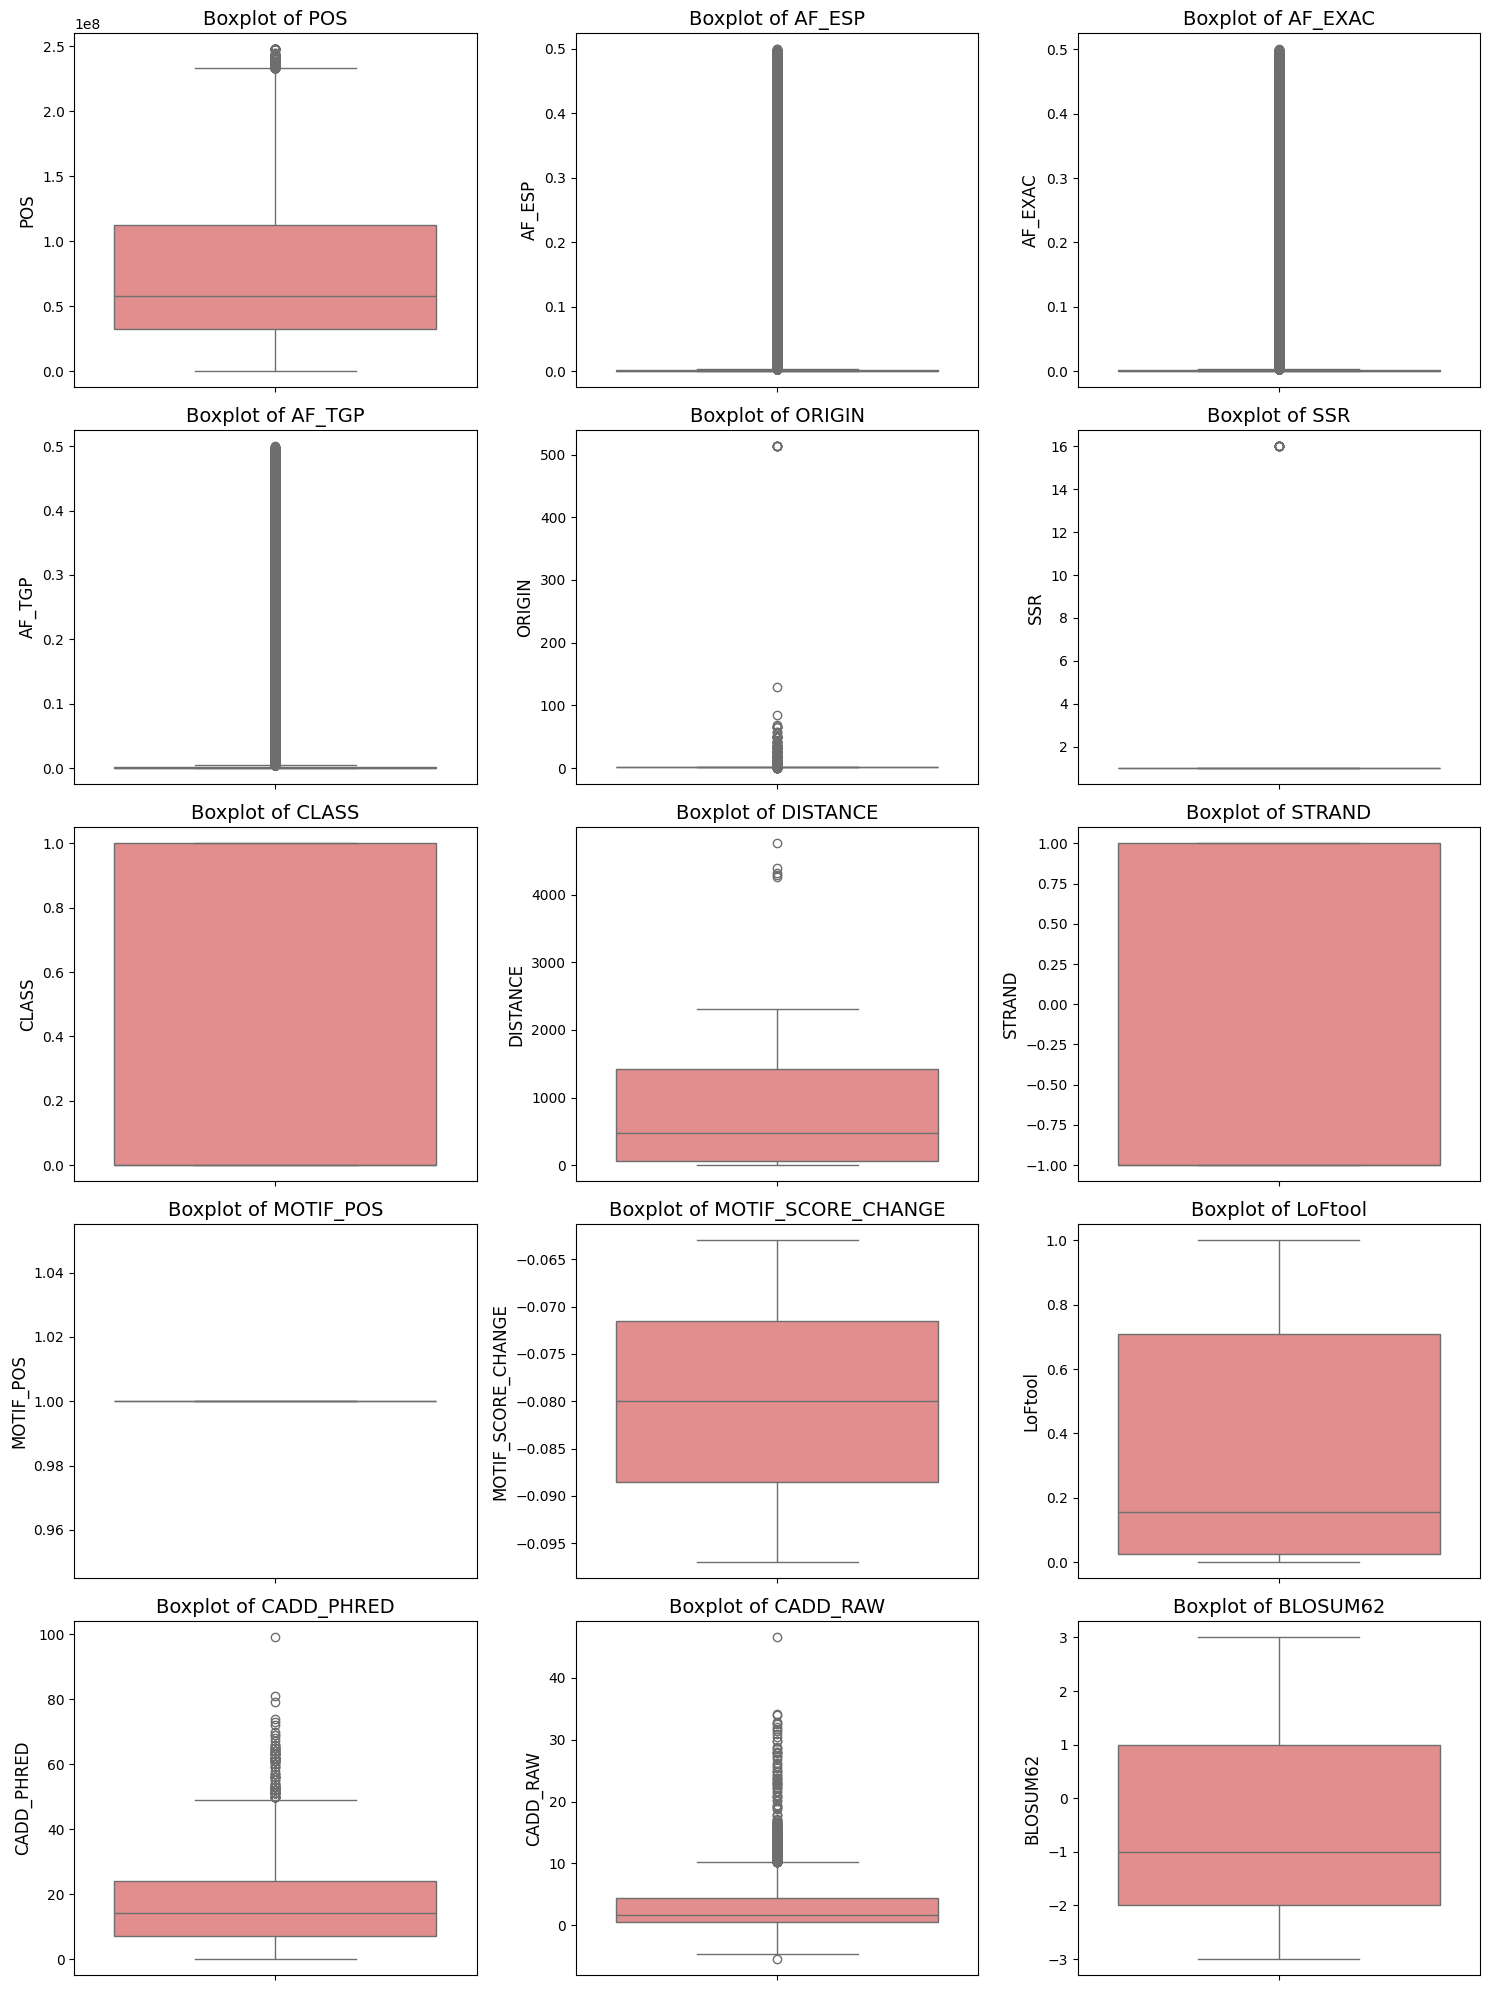

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

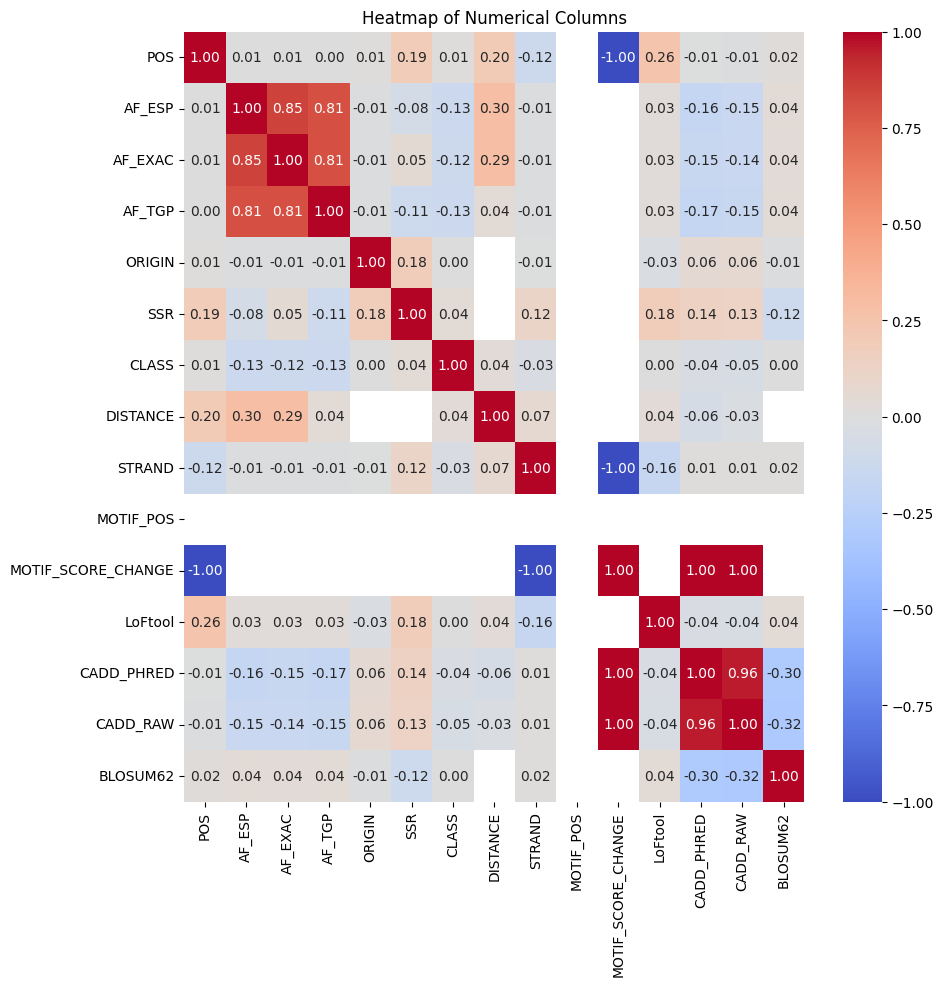

In [18]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [19]:
# Dropping columm 

df= df.drop(columns=['CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL', 'CLNVI', 'SSR', 'LoFtool', 'CADD_RAW'])

In [20]:
# Filling all numerical values with mean and categorical values with mode

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col] = encoder.fit_transform(df[col].astype(str).values)

In [25]:
X = df.drop(columns=['BLOSUM62'])
y = df['BLOSUM62']

In [26]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [27]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [30]:
# Convert continuous target values into discrete classes
y_train_binned = pd.cut(y_train, bins=3, labels=[0, 1, 2])  
y_test_binned = pd.cut(y_test, bins=3, labels=[0, 1, 2])

model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train_binned)
    scores.append(accuracy_score(y_test_binned, model.predict(X_test)))

print(scores)

[0.723423838011965, 0.7600092038656235, 0.9993864089584292, 0.9776039269826661, 0.8057217364626477, 0.9746126706550085, 0.9986961190366621, 0.9990029145574475, 0.7291762540266912]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.02      0.04      2765
           1       0.73      0.99      0.84      9507
           2       0.00      0.00      0.00       766

    accuracy                           0.72     13038
   macro avg       0.33      0.34      0.29     13038
weighted avg       0.59      0.72      0.62     13038

Confusion Matrix:
 [[  58 2707    0]
 [ 133 9374    0]
 [  21  745    0]]


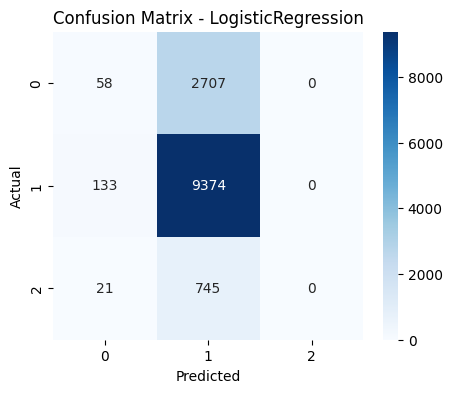

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.44      0.49      2765
           1       0.80      0.91      0.85      9507
           2       0.00      0.00      0.00       766

    accuracy                           0.76     13038
   macro avg       0.45      0.45      0.45     13038
weighted avg       0.70      0.76      0.73     13038

Confusion Matrix:
 [[1216 1549    0]
 [ 814 8693    0]
 [ 146  620    0]]


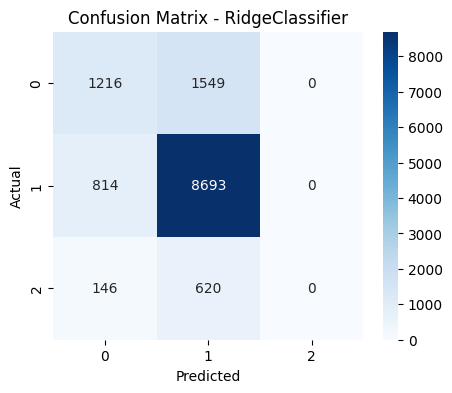

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2765
           1       1.00      1.00      1.00      9507
           2       1.00      1.00      1.00       766

    accuracy                           1.00     13038
   macro avg       1.00      1.00      1.00     13038
weighted avg       1.00      1.00      1.00     13038

Confusion Matrix:
 [[2758    6    1]
 [   0 9507    0]
 [   0    1  765]]


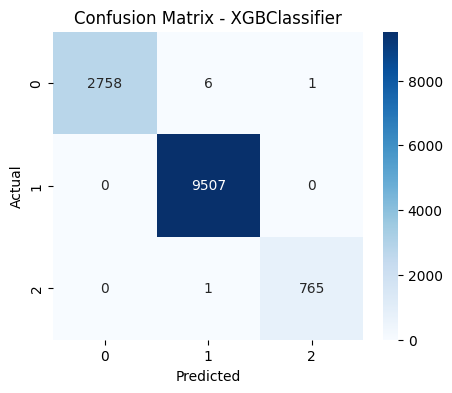

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      2765
           1       0.98      0.99      0.99      9507
           2       0.98      0.83      0.90       766

    accuracy                           0.98     13038
   macro avg       0.97      0.93      0.95     13038
weighted avg       0.98      0.98      0.97     13038

Confusion Matrix:
 [[2666   91    8]
 [  91 9412    4]
 [  43   87  636]]


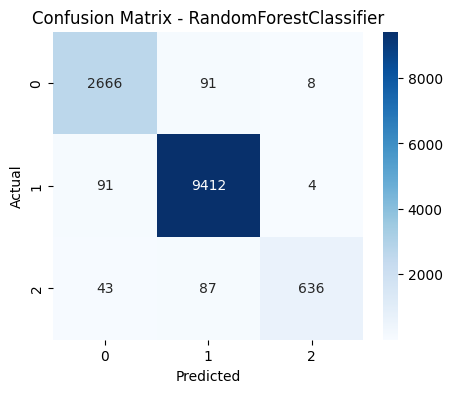

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.74      0.65      2765
           1       0.89      0.87      0.88      9507
           2       0.92      0.27      0.41       766

    accuracy                           0.81     13038
   macro avg       0.80      0.63      0.65     13038
weighted avg       0.83      0.81      0.80     13038

Confusion Matrix:
 [[2047  710    8]
 [1244 8253   10]
 [ 283  278  205]]


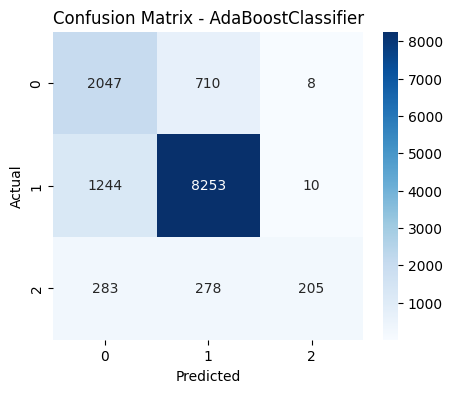

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2765
           1       0.97      0.99      0.98      9507
           2       0.99      0.92      0.95       766

    accuracy                           0.97     13038
   macro avg       0.98      0.95      0.96     13038
weighted avg       0.97      0.97      0.97     13038

Confusion Matrix:
 [[2562  202    1]
 [  60 9443    4]
 [   6   58  702]]


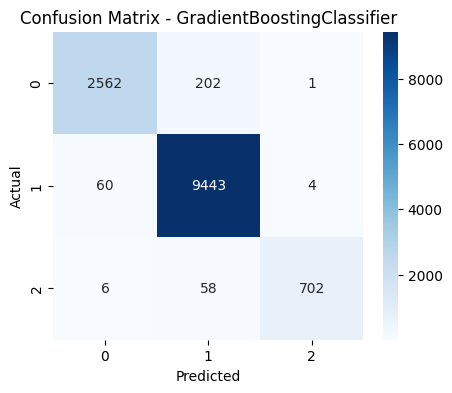

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2765
           1       1.00      1.00      1.00      9507
           2       1.00      1.00      1.00       766

    accuracy                           1.00     13038
   macro avg       1.00      1.00      1.00     13038
weighted avg       1.00      1.00      1.00     13038

Confusion Matrix:
 [[2756    9    0]
 [   4 9502    1]
 [   0    0  766]]


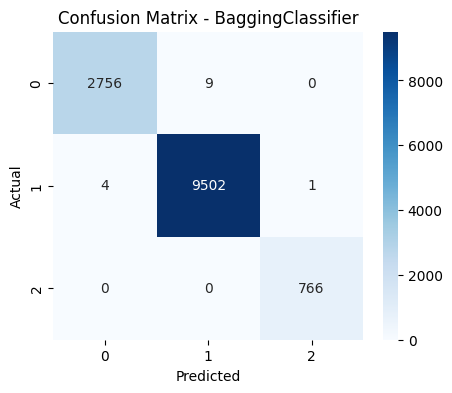

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2765
           1       1.00      1.00      1.00      9507
           2       1.00      1.00      1.00       766

    accuracy                           1.00     13038
   macro avg       1.00      1.00      1.00     13038
weighted avg       1.00      1.00      1.00     13038

Confusion Matrix:
 [[2759    6    0]
 [   8 9498    1]
 [   0    0  766]]


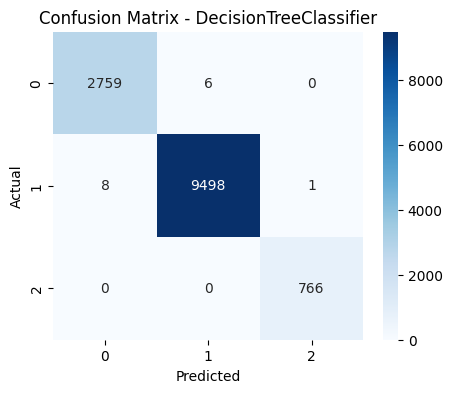

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2765
           1       0.73      1.00      0.84      9507
           2       0.00      0.00      0.00       766

    accuracy                           0.73     13038
   macro avg       0.24      0.33      0.28     13038
weighted avg       0.53      0.73      0.61     13038

Confusion Matrix:
 [[   0 2765    0]
 [   0 9507    0]
 [   0  766    0]]


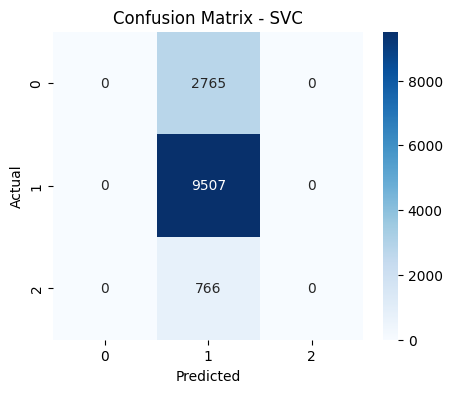

In [32]:
# Convert continuous target values into discrete classes
y_train_binned = pd.cut(y_train, bins=3, labels=[0, 1, 2])  
y_test_binned = pd.cut(y_test, bins=3, labels=[0, 1, 2])

for model in model_li:
    model.fit(X_train, y_train_binned)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test_binned, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_binned, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test_binned, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()